In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl (276.6 MB)




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install opencv-python

                                              0.0/38.1 MB ? eta -:--:--
                                              0.1/38.1 MB 4.2 MB/s eta 0:00:10
                                              0.3/38.1 MB 3.5 MB/s eta 0:00:11
                                              0.4/38.1 MB 3.4 MB/s eta 0:00:11
                                              0.6/38.1 MB 3.3 MB/s eta 0:00:12
                                              0.7/38.1 MB 3.1 MB/s eta 0:00:12
                                              0.9/38.1 MB 3.2 MB/s eta 0:00:12
     -                                        1.1/38.1 MB 3.4 MB/s eta 0:00:11
     -                                        1.2/38.1 MB 3.1 MB/s eta 0:00:12
     -                                        1.3/38.1 MB 3.1 MB/s eta 0:00:12
     -                                        1.4/38.1 MB 3.1 MB/s eta 0:00:12
     -                                        1.4/38.1 MB 2.8 MB/s eta 0:00:14
     -                                        1.6/38.1 MB 2


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
## Importing required libraries

import tensorflow
print(f"Tensorflow version: ",{tensorflow.__version__})  ## Checking the version of tensorflow
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import load_model
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Tensorflow version:  {'2.13.0'}


In [3]:
## Ussing CNN for image classification

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [4]:
## Getting an mnist dataset
from tensorflow.keras.datasets import mnist
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data() ## Dividing data in train and test datset

In [5]:
print(f"Shape of entire input training dataset: {X_train_full.shape}")
print(f"Shape of entire output test dataset: {y_train_full.shape}")

Shape of entire input training dataset: (60000, 28, 28)
Shape of entire output test dataset: (60000,)


In [6]:
print(f"Shape of  input test dataset: {X_test.shape}")
print(f"Shape of ouput test dataset: {y_test.shape}")

Shape of  input test dataset: (10000, 28, 28)
Shape of ouput test dataset: (10000,)


In [7]:
## We need to reshashape our dataset to 4D from 3D

In [8]:
X_train_full = X_train_full.reshape(X_train_full.shape[0],28,28,1)    ## Since datasets contains grayscale images we have only one layer
print(f"Shape of entire input training dataset after reshaping :{X_train_full.shape}")

X_test = X_test.reshape(X_test.shape[0],28,28,1)
print(f"Shape of entire input test dataset after reshaping :{X_test.shape}")

Shape of entire input training dataset after reshaping :(60000, 28, 28, 1)
Shape of entire input test dataset after reshaping :(10000, 28, 28, 1)


In [9]:
## Normalization from 0-255 to 0-1

In [10]:
X_train_full = X_train_full/255
X_test = X_test/255

In [11]:
    ## One hot encoding the output data

In [12]:
y_train_full.shape

(60000,)

In [13]:
from tensorflow.keras.utils import to_categorical

y_train_full = to_categorical(y_train_full,10) ## Since we have 10 categries of images which has numbers from 0-9
y_test = to_categorical(y_test,10)

In [14]:
y_train_full.shape

(60000, 10)

In [15]:
y_test.shape

(10000, 10)

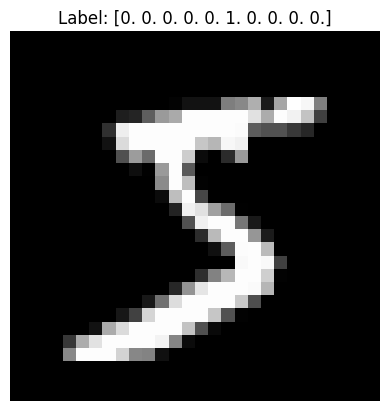

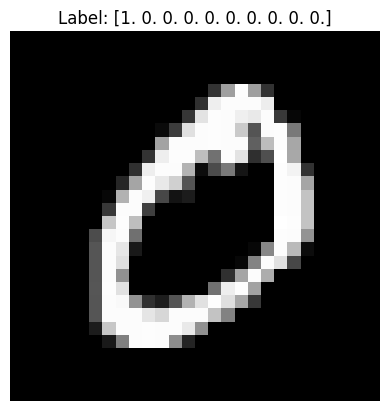

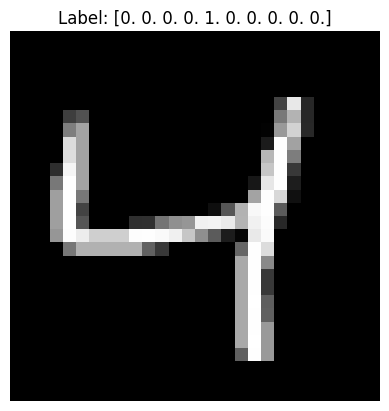

In [16]:
## Plotting some images of mnist datset

num_images_to_plot = 3
for i in range(num_images_to_plot):
    
    plt.imshow(X_train_full[i], cmap='gray')
    plt.title(f"Label: {y_train_full[i]}")
    plt.axis('off')
    plt.show()

In [17]:
X_train,X_validation = X_train_full[:55000],X_train_full[55000:]

In [18]:
y_train,y_validation = y_train_full[:55000],y_train_full[55000:]

In [19]:
## Building Model Architecture (LENET)

In [20]:
model = Sequential()

In [21]:
from sklearn.preprocessing import KernelCenterer
model.add(Conv2D(6,kernel_size = (5,5),strides=(1,1),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size = (5,5),strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [23]:
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [24]:
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])

In [25]:
## Training model

model.fit(X_train,y_train,batch_size=128,epochs=4,verbose=1,validation_data=(X_validation,y_validation))

Epoch 1/4
430/430 [==============================] - 42s 88ms/step - loss: 0.3437 - accuracy: 0.8977 - val_loss: 0.0911 - val_accuracy: 0.9738
Epoch 2/4
430/430 [==============================] - 38s 88ms/step - loss: 0.0937 - accuracy: 0.9701 - val_loss: 0.0651 - val_accuracy: 0.9808
Epoch 3/4
430/430 [==============================] - 38s 88ms/step - loss: 0.0664 - accuracy: 0.9793 - val_loss: 0.0652 - val_accuracy: 0.9816
Epoch 4/4
430/430 [==============================] - 38s 88ms/step - loss: 0.0529 - accuracy: 0.9830 - val_loss: 0.0522 - val_accuracy: 0.9856


In [26]:
## Testing the model

score = model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.0454 - accuracy: 0.9855


In [27]:
# Preprocess an image for prediction
def preprocess_image(image):
    image = cv2.resize(image, (28, 28))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=-1)
    return image

In [28]:
# Real-time number identification
def identify_number(image):
    preprocessed_image = preprocess_image(image)
    prediction = model.predict(np.array([preprocessed_image]))
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class]
    return predicted_class, confidence

In [31]:
cap = cv2.VideoCapture(0)  # Open the default camera (change the index if you have multiple cameras)

In [30]:
# Real-time processing loop


while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Identify the number in the frame
    predicted_class, confidence = identify_number(frame)
    
    # Display the result on the frame
    label = f"Predicted: {predicted_class} (Confidence: {confidence:.2f})"
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    cv2.imshow('Real-time Number Identification', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 97ms/step


KeyboardInterrupt: 